### Exercise: Multiple Minima

Try to run the example above again, but instead use the function `x**6 - x**2 - 0.25x`. Remember that the gradient won't be `2 * x` anymore, and change the update line `curr_x = curr_x - learning_rate * (2 * curr_x)` accordingly.

I'd change the range you plot it over to [-1.5, 1.5] to make it clearer what's going on.

How is the result affected by the initial location now? Is gradient descent always able to find the minimum value of the function (this should be about `-0.578`)? 

Feel free to copy and modify the code from the cell above.

Final value: -0.7247076514396668
Final function value: -0.19915472768336898
Final value: 0.7883151684371479
Final function value: -0.578526196616465


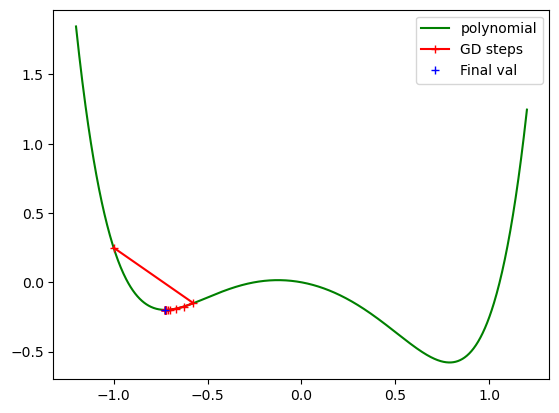

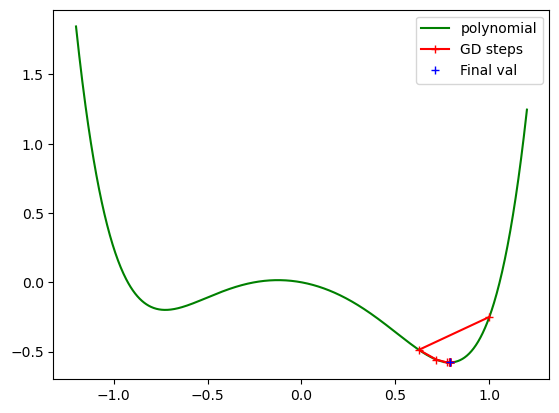

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# I've made this into a function, to make it easier to run the code multiple times.
def do_gradient_descent(initial_x, learning_rate=0.1, n_steps=15):
    n_samples = 1000
    x = np.linspace(-1.2, 1.2, num=n_samples)
    function_vals = x**6 - x**2 - 0.25*x

    step_vals = np.zeros([n_steps]) # Make an array to store the result of gradient descent at each step.
    curr_x = initial_x
    step_vals[0] = curr_x

    for step in range(1, n_steps):
        curr_x = curr_x - learning_rate * (6 * curr_x**5 - 2*curr_x - 0.25) 
        step_vals[step] = curr_x

    step_func_vals = step_vals**6 - step_vals**2 - 0.25*step_vals

    fig, ax = plt.subplots()
    func_line = ax.plot(x, function_vals, "g", label="polynomial")
    step_line = ax.plot(step_vals, step_func_vals, "r+-", label="GD steps")# Plot all the steps in red, using +s
    final_line = ax.plot(step_vals[-1], step_func_vals[-1], "b+", label="Final val")
    ax.legend()

    print("Final value:", step_vals[-1])
    print("Final function value:", step_func_vals[-1])

# If we start from -1, we end up finding a local minimum to the left.
do_gradient_descent(initial_x = -1)

# If we start from 1, we end up finding the proper global minimum to the right.
do_gradient_descent(initial_x = 1)

# Exercise: Using Automatic Differentiation

Try to use automatic differentiation to find the minimum of the function below, which is a simple [Gabor filter](https://en.wikipedia.org/wiki/Gabor_filter). How do the results change if you move the starting location?

Final x tensor([ 0.3296, -0.4671], requires_grad=True)


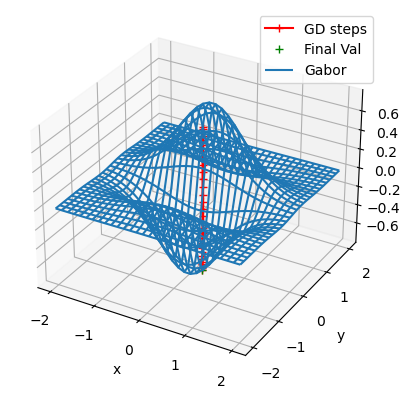

In [2]:
import torch, math
import matplotlib.pyplot as plt

def gaussian(r):
    return torch.exp(-r**2)

# Here's the function you should find the minimum of.
def gabor(x, y):
    r = torch.sqrt(x**2 + y**2)
    return gaussian(r) * torch.sin(3*y)

# Let's plot the function first. Note the torch functions (linspace etc)
# are very similar to the corresponding ones from numpy.
x_vals = torch.linspace(-2, 2, 30)
y_vals = torch.linspace(-2, 2, 30)
x_vals, y_vals = torch.meshgrid(x_vals, y_vals)
height = gabor(x_vals, y_vals)

ax = plt.axes(projection='3d')
ax.plot_wireframe(x_vals, y_vals, height, label="Gabor")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Save your values during the optimisation here to plot at the end.
step_x_vals = []
step_y_vals = []
step_heights = []

n_iters = 30
learning_rate = 0.03

# Declare your variable x you want to optimise. Make sure to use requires_grad = True!
# We're working in 2D now, so x should be a tensor of size [2].
x = torch.tensor([0.1,0.4], requires_grad=True) # Try changing the starting location.


# Declare the optimizer (see example above.)
optimizer = torch.optim.Adam([x], lr=learning_rate)


for iter in range(n_iters):
    # Do the update step
    optimizer.zero_grad()
    loss = gabor(x[0], x[1])
    step_x_vals.append(x[0].detach())
    step_y_vals.append(x[1].detach())
    step_heights.append(loss.detach())
    loss.backward()
    optimizer.step()

# Print the final value of x.
print("Final x", x)

# Plot the optimiser path.
ax.plot(step_x_vals, step_y_vals, step_heights, "r+-", label="GD steps")
ax.plot([x[0].detach()], [x[1].detach()], loss.detach(), "g+", label="Final Val")
ax.legend()